In [1]:
import random
import timeit

In [2]:
def create_sequence_of_interest(length_of_seq):
    list_of_flips=[]
    for this_flip in range(length_of_seq):
        list_of_flips.append(random.randint(1, 2))
    return tuple(list_of_flips)

In [3]:
def find_match(sequence_of_interest):
    start_time = timeit.default_timer()
    number_of_coin_flips=0
    this_run=[]  # store the results of the random coin flips in a list
    while True:
        coin = random.randint(1, 2) # random coin flip results in 1 or 2
        number_of_coin_flips+=1
        this_run.append(coin)       # add coin flip result to list
        if (len(this_run)==len(sequence_of_interest)):
            found_match=False
            for flip_indx in range(len(sequence_of_interest)):
                if (sequence_of_interest[flip_indx] == this_run[flip_indx]):
                    found_match=True
                else: # patterns don't match
                    found_match=False
                    this_run=[]
                    break
            if (found_match==True):
                #print(this_run)
                break

    #print("number of coin flips:",number_of_coin_flips)
    elapsed = timeit.default_timer() - start_time
    #print(str(elapsed) + " seconds")
    return elapsed, number_of_coin_flips

In [4]:
number_of_tries_per_loop=10
start_length=3
end_length=10

list_of_results=[]
for length_of_seq in range(3,10):
    for this_try in range(number_of_tries_per_loop):
        sequence_of_interest = create_sequence_of_interest(length_of_seq)
#        print(sequence_of_interest)

        elapsed, number_of_coin_flips = find_match(sequence_of_interest)
#        print(elapsed,"seconds")
#        print(number_of_coin_flips)
        this_result={}
        this_result['elapsed time in seconds'] = elapsed
        this_result['number of flips'] = number_of_coin_flips
        this_result['sequence length'] = length_of_seq
        list_of_results.append(this_result)

In [5]:
import pandas
pandas.__version__

'0.23.4'

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.2.3'

In [7]:
results_df = pandas.DataFrame(list_of_results)
results_df.head(10)

,elapsed time in seconds,number of flips,sequence length
0,0.000021,3,3
1,0.000093,15,3
2,0.000057,9,3
3,0.000234,9,3
4,0.000138,21,3
5,0.000040,6,3
6,0.000039,6,3
7,0.000161,24,3
8,0.000396,42,3
9,0.000056,9,3


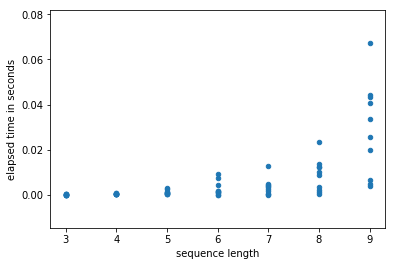

In [8]:
results_df.plot.scatter(x='sequence length',y='elapsed time in seconds')
plt.show()

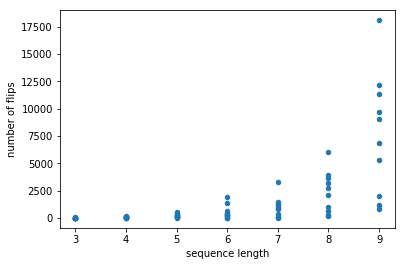

In [10]:
results_df.plot.scatter(x='sequence length',y='number of flips')
plt.show()

In [12]:
results_df.groupby('sequence length').describe()

elapsed time in seconds                                \
                                  count      mean       std       min   
sequence length                                                         
3                                  10.0  0.000123  0.000117  0.000021   
4                                  10.0  0.000362  0.000165  0.000160   
5                                  10.0  0.001092  0.000993  0.000166   
6                                  10.0  0.002779  0.003253  0.000065   
7                                  10.0  0.003408  0.003663  0.000114   
8                                  10.0  0.008727  0.007201  0.000550   
9                                  10.0  0.028908  0.020714  0.003771   

                                                        number of flips  \
                      25%       50%       75%       max           count   
sequence length                                                           
3                0.000044  0.000075  0.000155  0.000396            10.0   
4                0.000256  0.000322  0.000455  0.000630            10.0   
5                0.000472  0.000802  0.001104  0.003053            10.0   
6                0.000841  0.001358  0.003773  0.009394            10.0   
7                0.000723  0.002926  0.004244  0.012592            10.0   
8                0.002388  0.009367  0.012273  0.023507            10.0   
9                0.010030  0.029397  0.042623  0.067073            10.0   

                                                                        \
                   mean          std    min      25%     50%       75%   
sequence length                                                          
3                  14.4    11.815244    3.0     6.75     9.0     19.50   
4                  79.6    51.792749   16.0    43.00    74.0    109.00   
5                 213.0   169.463205   25.0    92.50   192.5    275.00   
6                 551.4   607.970065   18.0   231.00   327.0    582.00   
7                 948.5   979.945832   35.0   187.25   836.5   1233.75   
8                2364.8  1884.045576  176.0   736.00  2404.0   3526.00   
9                7652.7  5538.810964  846.0  2835.00  7920.0  10935.00   

                          
                     max  
sequence length           
3                   42.0  
4                  176.0  
5                  585.0  
6                 1902.0  
7                 3311.0  
8                 6008.0  
9                18099.0